### Problem Statement:
    Building a ML model to predict the tip based on the provided data

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

#### Define required libraries with which the model will optmised.

In [65]:
# we will import the libraries at the time of required while we are progressing with our machine building 
# as of now we are importing the pandas library for the purpose of getting the data and load it into the DataFrame
import pandas as pd
import numpy as np

In [2]:
# loading the data from excel file into variable
data=pd.read_excel("Case Waiter Tips.xlsx",sheet_name='Data',header=1)

In [3]:
# framing the data into DataFrame for further analysis
tdata=pd.DataFrame(data)

In [4]:
# checking the Data
tdata.head(3)

,Unnamed: 0,Total Bill in INR,Tip to the Waiter,Sex,Smoker,Day,Meal Type,Number of people in a table
0,NaN,1274.25,75.75,Female,No,Sun,Dinner,2
1,NaN,775.50,124.50,Male,No,Sun,Dinner,3
2,NaN,1575.75,262.50,Male,No,Sun,Dinner,3


In [ ]:
# Renaming the columns
tdata.rename(columns={'Total Bill in INR':"Bill Amount","Tip to the Waiter":"Tip Amount","Number of people in a table":"No Of People per Table"})

#### Observations:
    1. We have one unwanted column in the data

In [5]:
# deleting the unwanted column
tdata.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# checking the data types and other information like no of entries
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Bill in INR            244 non-null    float64
 1   Tip to the Waiter            244 non-null    float64
 2   Sex                          244 non-null    object 
 3   Smoker                       244 non-null    object 
 4   Day                          244 non-null    object 
 5   Meal Type                    244 non-null    object 
 6   Number of people in a table  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


#### Observations:
    1.there are 7 fileds in the data
    2.2 are float data types, 4 are string data type and 1 int data type
    3.maximum entries in each field is 244

### EDA /Statistical and Visual Analysis

#### Statistical Analysis

In [7]:
tdata.describe(include='all')

,Total Bill in INR,Tip to the Waiter,Sex,Smoker,Day,Meal Type,Number of people in a table
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,1483.945697,224.870902,NaN,NaN,NaN,NaN,2.569672
std,667.680897,103.772864,NaN,NaN,NaN,NaN,0.951100
min,230.250000,75.000000,NaN,NaN,NaN,NaN,1.000000
25%,1001.062500,150.000000,NaN,NaN,NaN,NaN,2.000000
50%,1334.625000,217.500000,NaN,NaN,NaN,NaN,2.000000
75%,1809.562500,267.187500,NaN,NaN,NaN,NaN,3.000000


#### Observations:
    1.In Total Bill column Mean and median are not equal and median is less than the mean, 
        so the data is having some outliars, std is there but not so high.
        
    2.In Total Bill Column percentiles are not uniformly disturbuted and more values 
        at right side the data is right skewed
        
    3.In Tips Column std  is very high, mean value is higher than the median due to outliers.
    
    4.In Tips columns percentiles are not uniformly disturbuted and much difference towards the 
        right means data is right skewed.
        
    5.Sex column has 2 categories with male as majority.
    
    6.From the day column it is clear that the people interested to hang out during saturdays majorly.
    
    7.Based on the meal type it is clear that the people came out during evening times compared to 
        day time.
    

In [8]:
#checking for null values
tdata.isna().sum()

Total Bill in INR              0
Tip to the Waiter              0
Sex                            0
Smoker                         0
Day                            0
Meal Type                      0
Number of people in a table    0
dtype: int64

#### Observations:
            No null values are present in the data

### Graphical Analysis

#### Univarient Analysis

In [20]:
# importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=1, color_codes=True)

<AxesSubplot:>

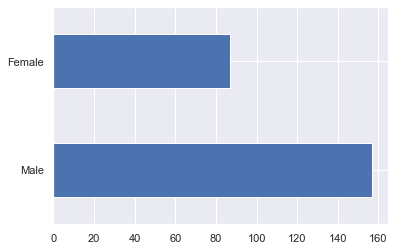

In [25]:
tdata['Sex'].value_counts().plot.barh()

#### Observations:
    Men are preferreing out having food than female

<AxesSubplot:>

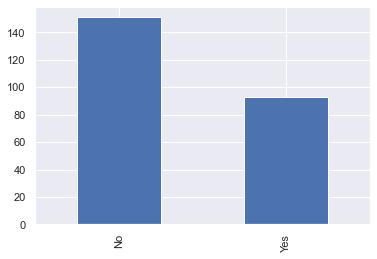

In [27]:
tdata['Smoker'].value_counts().plot.bar()

#### Observatiosn:
    People who are not smoking is tend have the out side food more

<AxesSubplot:>

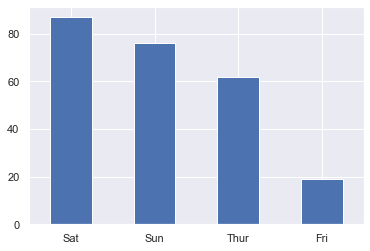

In [30]:
tdata['Day'].value_counts().plot.bar(rot=0)

#### Observations:
    Saturday is high to have out side food followed by sunday and thursday.

In [31]:
print(dir(tdata.plot))

['__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_all_kinds', '_common_kinds', '_constructor', '_dataframe_kinds', '_dir_additions', '_dir_deletions', '_get_call_args', '_hidden_attrs', '_kind_aliases', '_parent', '_reset_cache', '_series_kinds', 'area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


<AxesSubplot:ylabel='Meal Type'>

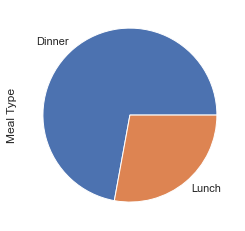

In [34]:
tdata['Meal Type'].value_counts().plot.pie()

#### Observations:
    Dinners time are mostly people hang out compared to lunch time.

<AxesSubplot:ylabel='Number of people in a table'>

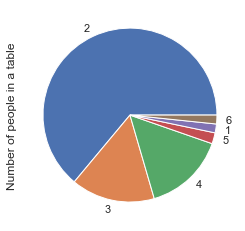

In [35]:
tdata['Number of people in a table'].value_counts().plot.pie()

#### Observations:
    2 people per tables are major followed by 3 and 4 people
    it seems the couples are going out compared to hang out with whole family.

#### Bivarient Analysis

<AxesSubplot:xlabel='Sex', ylabel='Tip to the Waiter'>

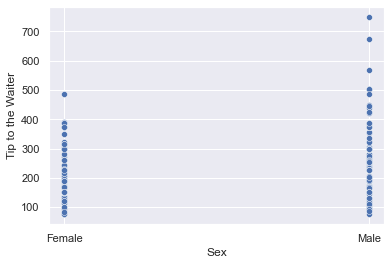

In [63]:
sns.scatterplot(x=tdata['Sex'],y=tdata['Tip to the Waiter'])

#### Observations:
     male are paying high amount in tips compared to female

<AxesSubplot:xlabel='Smoker', ylabel='Tip to the Waiter'>

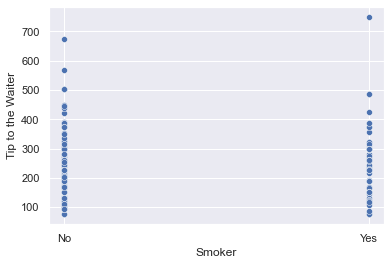

In [62]:
sns.scatterplot(x=tdata['Smoker'],y=tdata['Tip to the Waiter'])

#### Observations:
     smokers are non smokers paying tip is almost same

<AxesSubplot:xlabel='Day', ylabel='Tip to the Waiter'>

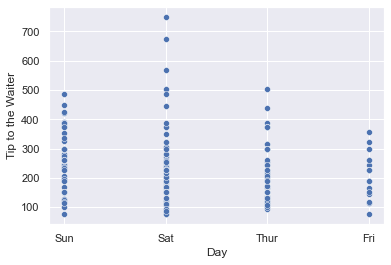

In [61]:
sns.scatterplot(x=tdata['Day'],y=tdata['Tip to the Waiter'])

#### Observations:
     tip amounts are paying high saturday followed by sunday and Thurday

<AxesSubplot:xlabel='Meal Type', ylabel='Tip to the Waiter'>

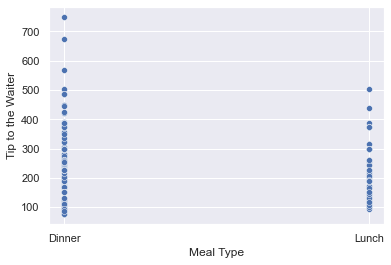

In [49]:
sns.scatterplot(x=tdata['Meal Type'],y=tdata['Tip to the Waiter'])

#### Observations:
    Higher amount of tips at dinner time compared to Lunch time

<Figure size 2880x1440 with 0 Axes>

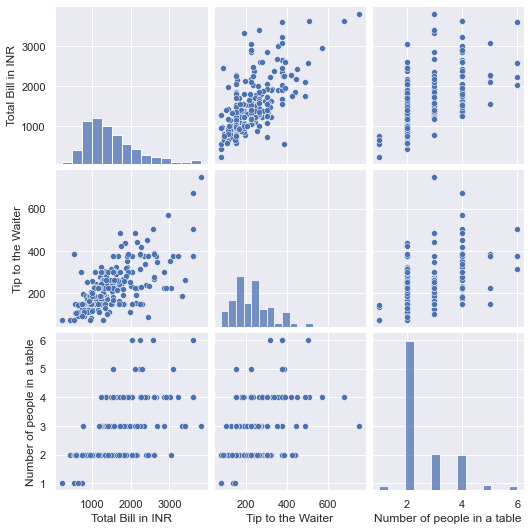

In [41]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=1, color_codes=True)
plt.figure(figsize=(40,20))
sns.pairplot(tdata)

#### Observations:
    1.it is clear that the higher the bill amount higher the tip too
    2.4 people per table are paying high tip compared to remaining

#### Checking for outliers

Total Bill in INR              AxesSubplot(0.125,0.848277;0.775x0.0317227)
Tip to the Waiter               AxesSubplot(0.125,0.81021;0.775x0.0317227)
Number of people in a table    AxesSubplot(0.125,0.772143;0.775x0.0317227)
dtype: object

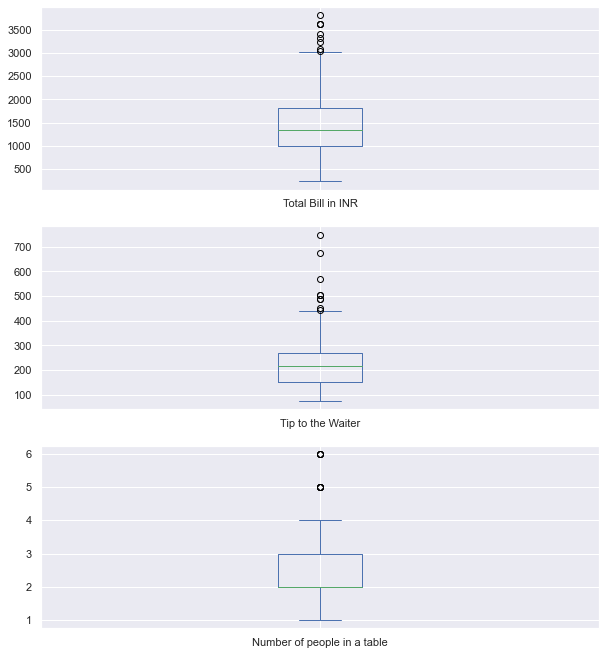

In [66]:
tdata.plot(kind='box',subplots=True, figsize=(10,80),layout=(20,1))

#### Observations:
    Outliers are present in both bill and tip column

#### Converting the string data to numeric data

In [70]:
# importing the label encoder from the sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [71]:
lb=LabelEncoder()

In [77]:
# changing the object data type to numeric data type
for i in tdata.columns:
    if tdata[i].dtype=='object':
        tdata[i]=lb.fit_transform(tdata[i])

#### Removing the Oultiers

In [78]:
# importing the zscore from scipy.stats
from scipy.stats import zscore

In [80]:
#calculating the zscore
z=np.abs(zscore(tdata))

In [103]:
# creating the new data set with zscore less than are equals to 3
tdata1=tdata[(z<=3).all(axis=1)]

In [104]:
#chekcing the data loss
print("percentage of data loss",(tdata.size-tdata1.size)*100/tdata.size,'%')

percentage of data loss 3.278688524590164 %


In [105]:
# the nameof new data set after removing the outliers is
# tdata1

<AxesSubplot:>

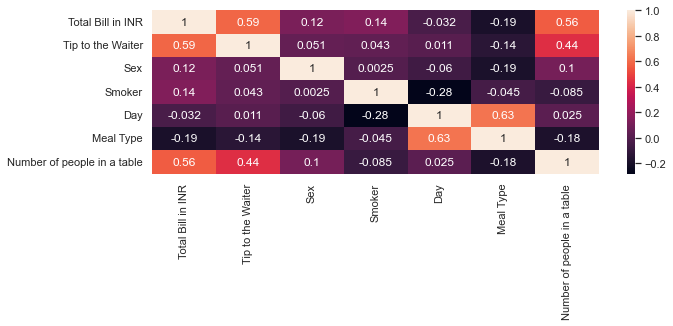

In [106]:
#finding the correlation between the dependent and independent variables
plt.figure(figsize=(10,3))
sns.heatmap(tdata1.corr(), annot=True)

#### Observations:
    No independent variables are correlated each other

#### skewness checking

In [107]:
tdata1.iloc[:,0:2].skew()

Total Bill in INR    0.957018
Tip to the Waiter    0.768670
dtype: float64

1. Skewness of less than +/-0.5 is acceptable more than that we have to reduce them

#### removing the skewness

In [108]:
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')

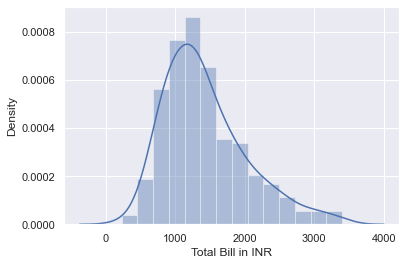

In [109]:
sns.distplot(tdata1['Total Bill in INR'])
temp=np.array(tdata1['Total Bill in INR'])
tdata1['Total Bill in INR']=power_transform(temp.reshape(-1,1), method="yeo-johnson")

<AxesSubplot:xlabel='Total Bill in INR', ylabel='Density'>

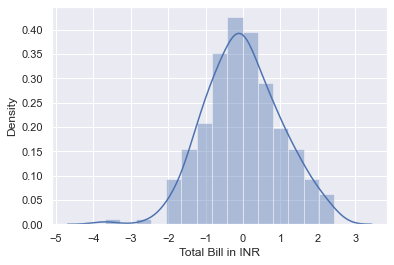

In [110]:
# distplot after removing the skewness
sns.distplot(tdata1['Total Bill in INR'])

<AxesSubplot:xlabel='Tip to the Waiter', ylabel='Density'>

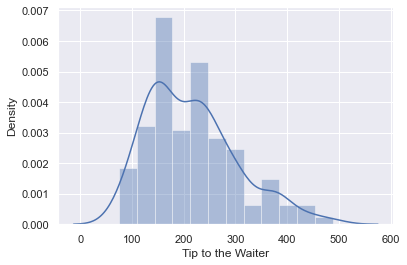

In [111]:
# before skewness removed
sns.distplot(tdata1['Tip to the Waiter'])

<AxesSubplot:xlabel='Tip to the Waiter', ylabel='Density'>

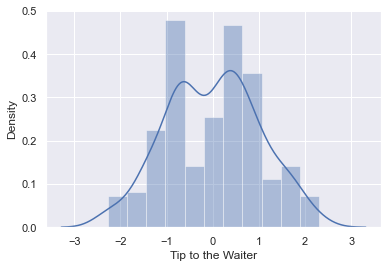

In [112]:
# after removing of skewness
temp=np.array(tdata1['Tip to the Waiter'])
tdata1['Tip to the Waiter']=power_transform(temp.reshape(-1,1), method="yeo-johnson")
sns.distplot(tdata1['Tip to the Waiter'])

### Scaling

In [113]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [114]:
# scale down the data
scale=MinMaxScaler()
temp=np.array(tdata1['Tip to the Waiter'])
tdata1['Tip to the Waiter']=scale.fit_transform(temp.reshape(-1,1))

#### Hyper perameter tuning
Hyper parameter tuning is nothing but the finding the correct parameters of a model so the model can perform at it highest performance state

In [115]:
# importing the required libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [116]:
# for that we are going to import 
from sklearn.model_selection import GridSearchCV

In [117]:
tdata1.head(1)

,Total Bill in INR,Tip to the Waiter,Sex,Smoker,Day,Meal Type,Number of people in a table
0,-0.107502,0.004716,0,0,2,0,2


In [118]:
#spliting the data
x=tdata1.iloc[:,[0,2,3,4,5,6]]
y=tdata1.iloc[:,1]

In [128]:
rf, ab,dt,lr=RandomForestRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), LinearRegression()
#creating perameters
model_par={'DecisionTreeRegressor':{'model':dt,'param':{'criterion' : ["mse", "friedman_mse", "mae", "poisson"],'splitter':['best','random']}},
           'RandomForestRegressor':{'model':rf,'param':{'n_estimators':[100,120,150],'criterion':['mse', 'mae'],'max_features':['auto','sqrt','log2']}},
           'AdaBoostRegressor':{'model':ab,'param':{'loss':['linear', 'square', 'exponential']}},
           'LinearRegression':{'model':lr,'param':{'fit_intercept':[True],'normalize':[True]}}
          }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=10,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': -0.20377902531185796,
  'best_params': {'criterion': 'poisson', 'splitter': 'random'}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.20871834391741642,
  'best_params': {'criterion': 'mae',
   'max_features': 'log2',
   'n_estimators': 120}},
 {'model': 'AdaBoostRegressor',
  'best_score': 0.2387955448066677,
  'best_params': {'loss': 'linear'}},
 {'model': 'LinearRegression',
  'best_score': 0.26981416672531966,
  'best_params': {'fit_intercept': True, 'normalize': True}}]

#### Cross Validation Score

In [129]:
# checking the cv score
for i in [rf, ab,dt,lr]:
    print(cross_val_score(i,x,y,cv=10).mean()*100)    

13.017997778598561
22.753392296341516
-45.1015660475086
26.98141667253199


#### Observations:
        best cv score also we got for lr model 
        Linear model performs best

#### model selection

In [121]:
lr=LinearRegression(fit_intercept=True,normalize=True)

In [138]:
I=[]
score=[]
ms=[]
r2=[]

for i in range(1000):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=i)
        lr.fit(xtrain,ytrain)
        tr=lr.score(xtrain,ytrain)
        te=lr.score(xtest,ytest)
        pre=lr.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ms.append(mse)
        r2.append(r)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2))
print('Mean Square Error Value',round(values.loc[0][3],2),"r2_score",round(values.iloc[0][1],2))


at random state 406.0 the model having the highest accuracy of 79.44
Mean Square Error Value 0.1 r2_score 0.79


In [140]:
### Model saving
import pickle
filename='tips.pkl'
pickle.dump(lr,open(filename,'wb'))